In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import mean_squared_error
import cv2
import os





In [2]:
df_train=pd.read_csv('/content/mnist_train.csv')
df_test=pd.read_csv('/content/mnist_test.csv')




In [3]:
df_train.head()


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(df_train.shape)
print(df_test.shape)

(59999, 785)
(9999, 785)


In [6]:
x_=np.array(df_train.iloc[:,1:])
y_=np.array(df_train.iloc[:,0])
x_test=np.array(df_test.iloc[:,1:])
y_test=np.array(df_test.iloc[:,0])

In [7]:
x_train,x_val,y_train,y_val=train_test_split(x_,y_,test_size=0.2)

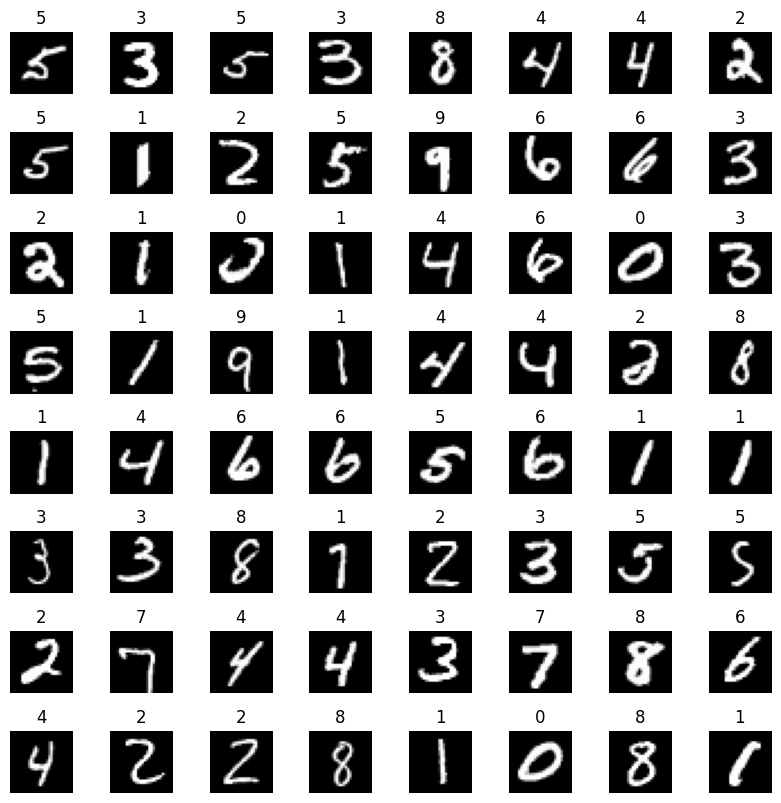

In [8]:
m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    x_random_reshaped = x_train[random_index].reshape((28,28))

    # Display the image
    ax.imshow(x_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [9]:
x_train=x_train
y_train=y_train.reshape(-1,1)

In [10]:
print(x_train.shape)
print(y_train.shape)


(47999, 784)
(47999, 1)


In [11]:
model=Sequential(
    [
     tf.keras.Input(shape=(784,)),
     Dense(units=25, activation='relu'),
     Dense(units=15, activation='relu'),
     Dense(units=10, activation='linear'),


    ])
model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)








In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2211
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3581
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1551
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9195
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7226
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5510
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4526
Epoch 8/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3596
Epoch 9/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2892
Epoch 10/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2527
Epoch 11/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2354
Epoch 12/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2179
E

In [14]:
prediction = model.predict(x_test[10].reshape(1,784))
print(f" predicting of {y_test[10]} is : {np.argmax(tf.nn.softmax(prediction))}")
prediction = model.predict(x_test[5055].reshape(1,784))
print(f" predicting of {y_test[5055]} :  {np.argmax(tf.nn.softmax(prediction))}")

1/1 [==============================] - 0s 136ms/step
 predicting of 6 is : 6
1/1 [==============================] - 0s 24ms/step
 predicting of 5 :  5


313/313 [==============================] - 0s 1ms/step


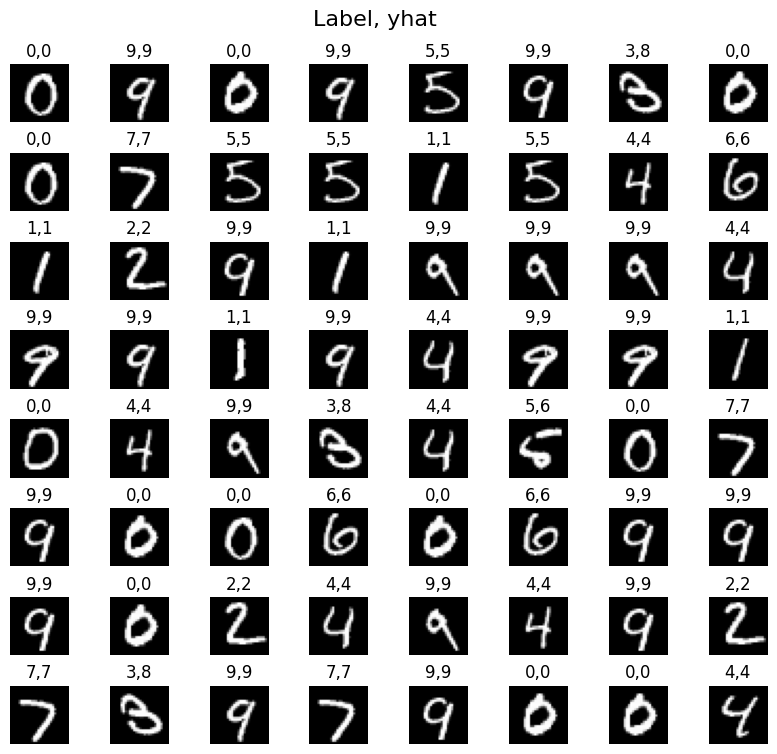

In [15]:
m, n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(20)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28,28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(x_test)


    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{np.argmax(tf.nn.softmax(prediction[random_index]))}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [64]:
def accuracy(y,y_hat):

    m=y.shape[0]
    prediction=[]
    for i in range(m):
        prediction.append(np.argmax(tf.nn.softmax(y_hat[i])))
    acc=len(y[y==prediction])/len(y)
    return acc

In [68]:
a=accuracy(y_test,prediction)
print(f'the accuracy of this model is {a:3e}')

the accuracy of this model is 9.376938e-01
